<a href="https://colab.research.google.com/github/RaymondPTrain/ml/blob/master/ManningProject3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
batch_size = 32
num_classes = 10
epochs = 10

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
#              optimizer=opt,
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [11]:
  ehist=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5322 - accuracy: 0.4479 - val_loss: 1.1719 - val_accuracy: 0.5745
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1385 - accuracy: 0.6034 - val_loss: 1.0272 - val_accuracy: 0.6389
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0065 - accuracy: 0.6528 - val_loss: 0.9111 - val_accuracy: 0.6937
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9643 - accuracy: 0.6724 - val_loss: 1.1449 - val_accuracy: 0.6531
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9720 - accuracy: 0.6760 - val_loss: 1.2352 - val_accuracy: 0.6434
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0062 - accuracy: 0.6685 - val_loss: 0.9486 - val_accuracy: 0.6942
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0378 - accuracy: 0.6628 - val_loss: 0.9563 - val_accuracy:

In [12]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 1.3011 - accuracy: 0.5920

Test accuracy: 0.5920000076293945


In [13]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [14]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [15]:
predictions = probability_model.predict(x_test)

In [16]:
print(predictions[208])
print(np.argmax(predictions[208]))
print(np.argmax(y_test[208]))

[0.08533741 0.08533741 0.08533742 0.08533743 0.0853406  0.08533867
 0.08533741 0.2319589  0.08533741 0.08533741]
7
7


In [17]:
x_test.shape

(10000, 32, 32, 3)

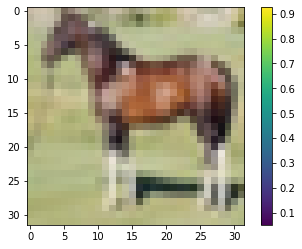

In [18]:
plt.figure()
plt.imshow(x_test[208])
plt.colorbar()
plt.grid(False)
plt.show()

In [19]:
def plotIt(i):
  plt.figure()
  plt.imshow(x_test[i])
  plt.colorbar()
  plt.grid(False)
  plt.show()  

In [20]:
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

ship airplane


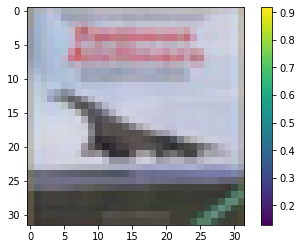

cat airplane


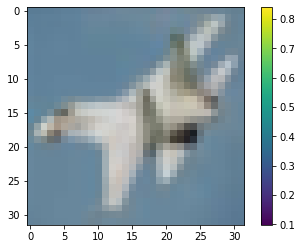

cat horse


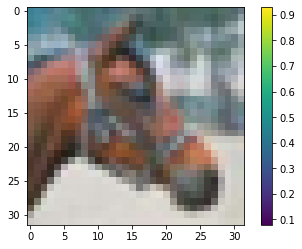

airplane deer


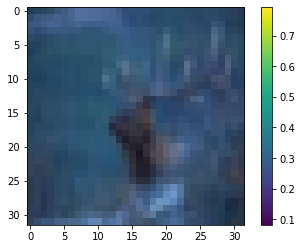

automobile truck


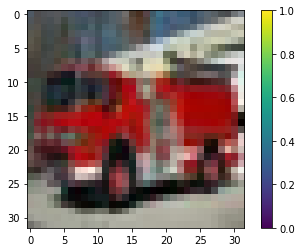

dog bird


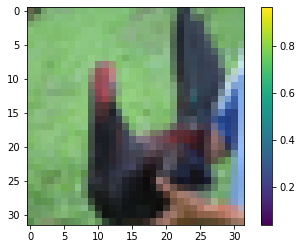

dog deer


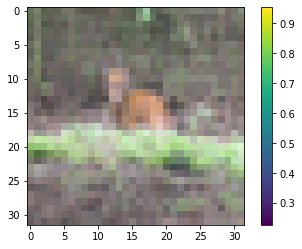

cat bird


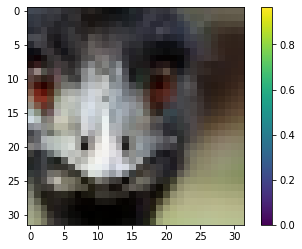

horse deer


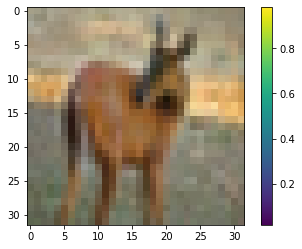

ship deer


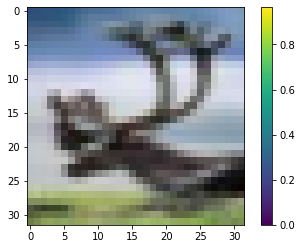

ship airplane


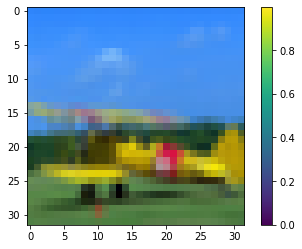

dog truck


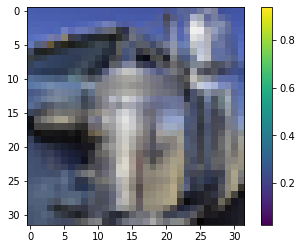

dog airplane


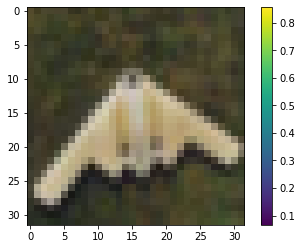

dog horse


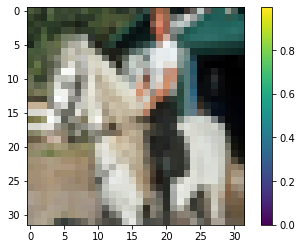

cat horse


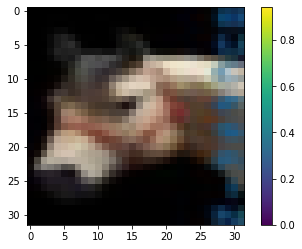

cat deer


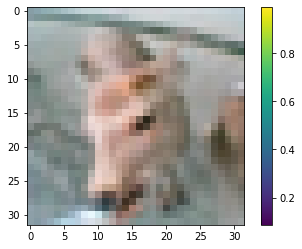

dog frog


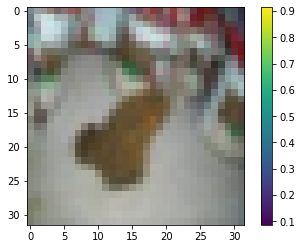

dog cat


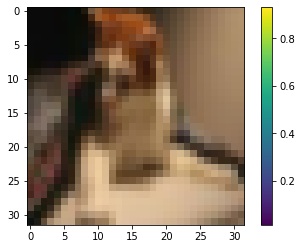

cat frog


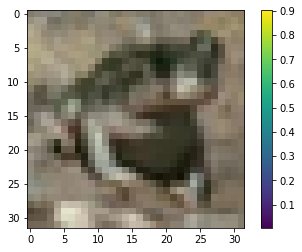

dog bird


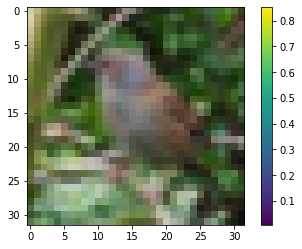

automobile bird


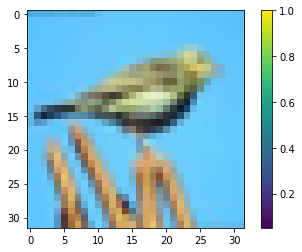

dog cat


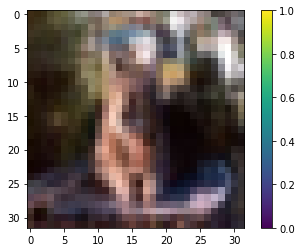

cat horse


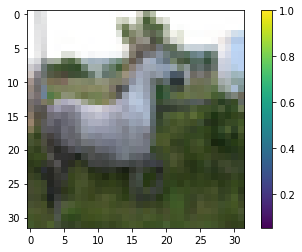

ship bird


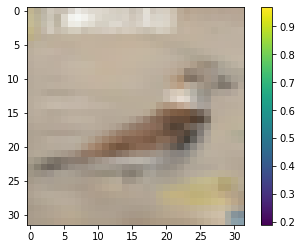

dog frog


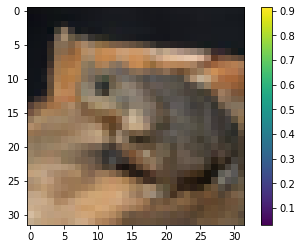

ship airplane


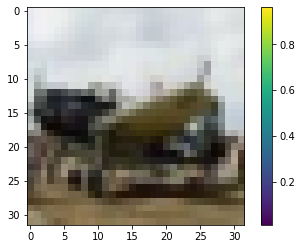

ship automobile


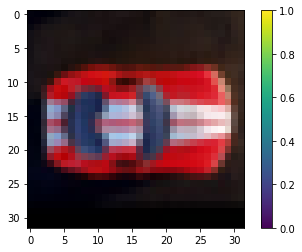

dog horse


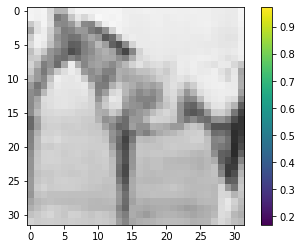

horse dog


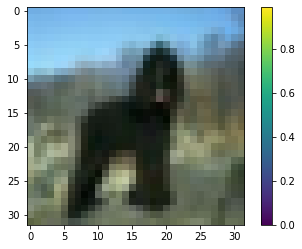

cat bird


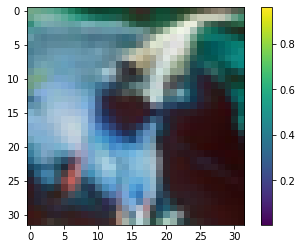

dog horse


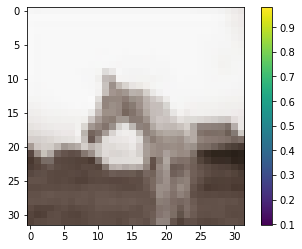

dog ship


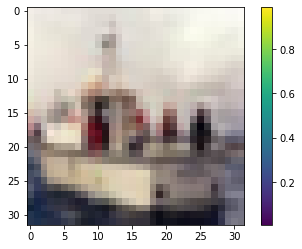

dog frog


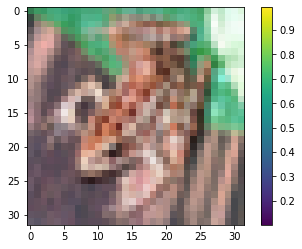

cat frog


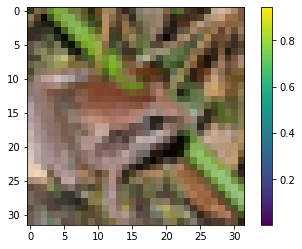

cat horse


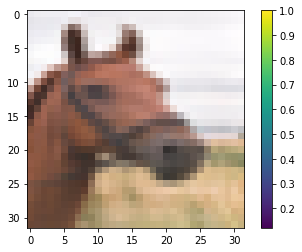

35


In [23]:
imissed = 0
for i in range(100):
  if np.argmax(predictions[i]) != np.argmax(y_test[i]):
    print(cifar_classes[np.argmax(predictions[i])],cifar_classes[np.argmax(y_test[i])])
    plotIt(i)
    imissed += 1
print (imissed)

# Load pre-trained model and add new layers

Load the VGG16 model base.   Add new layers.   For workflow

In [24]:
# Load data and required packages
import tensorflow as tf
from keras import callbacks
from keras import optimizers
from keras.engine import Model
from keras.layers import Dropout, Flatten, Dense,GlobalAveragePooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.applications import VGG16
from keras.datasets import cifar10
from keras.utils import to_categorical
import numpy as np
input_shape = (48, 48, 3)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
# resize train set
X_train_resized = []
for img in X_train:
  X_train_resized.append(np.resize(img, input_shape) / 255)
  
X_train_resized = np.array(X_train_resized)
print(X_train_resized.shape)
# resize test set
X_test_resized = []
for img in X_test:
  X_test_resized.append(np.resize(img, input_shape) / 255)
  
X_test_resized = np.array(X_test_resized)
print(X_test_resized.shape)

(50000, 48, 48, 3)
(10000, 48, 48, 3)


In [25]:
# We allow to the last convolutional andthe classification stages  to train
vgg = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
for layer in vgg.layers:
#  if layer.name == 'block5_conv1':
  if layer.name == 'block3_conv1':
    break
  layer.trainable = False
  print('Layer ' + layer.name + ' frozen.')
# We add our classificator (top_model) to the last layer of the model
#Flip these 2 lines
#last = base_model.layers[-1].output
last = vgg.get_layer('block3_pool').output
# This flatten was know to work
#x = Flatten()(last)
x =  GlobalAveragePooling2D()(last)
x=BatchNormalization()(x)
#x = Dense(1000, activation='relu', name='fc1')(x)
x = Dense(256, activation='relu', name='fc1')(x)
x = Dense(256, activation='relu', name='fc2')(x)
#x = Dropout(0.3)(x)
x=Dropout(.5)(x)
x = Dense(10, activation='softmax', name='predictions')(x)
ptmodel = Model(vgg.input, x)
# We compile the model
ptmodel.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# We see the new structure of the model
ptmodel.summary()

Layer input_3 frozen.
Layer block1_conv1 frozen.
Layer block1_conv2 frozen.
Layer block1_pool frozen.
Layer block2_conv1 frozen.
Layer block2_conv2 frozen.
Layer block2_pool frozen.
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
bloc

In [27]:
# Train the model
epochs = 10
batch_size = 256

phist = ptmodel.fit(X_train_resized, Y_train,
          batch_size=batch_size,
          validation_data=(X_test_resized, Y_test),
          epochs=epochs)

Epoch 1/10
196/196 [==============================] - 14s 69ms/step - loss: 1.4455 - accuracy: 0.4868 - val_loss: 2.0516 - val_accuracy: 0.3822
Epoch 2/10
196/196 [==============================] - 13s 68ms/step - loss: 1.1951 - accuracy: 0.5797 - val_loss: 2.2209 - val_accuracy: 0.3414
Epoch 3/10
196/196 [==============================] - 13s 66ms/step - loss: 1.1102 - accuracy: 0.6131 - val_loss: 1.6738 - val_accuracy: 0.4122
Epoch 4/10
196/196 [==============================] - 12s 63ms/step - loss: 1.0556 - accuracy: 0.6318 - val_loss: 1.2242 - val_accuracy: 0.5791
Epoch 5/10
196/196 [==============================] - 12s 63ms/step - loss: 0.9934 - accuracy: 0.6533 - val_loss: 1.3692 - val_accuracy: 0.5659
Epoch 6/10
196/196 [==============================] - 12s 63ms/step - loss: 0.9546 - accuracy: 0.6666 - val_loss: 1.3605 - val_accuracy: 0.5514
Epoch 7/10
196/196 [==============================] - 13s 64ms/step - loss: 0.9088 - accuracy: 0.6820 - val_loss: 1.3328 - val_accuracy:

In [28]:
# We evaluate the accuracy and the loss in the test set
scores = ptmodel.evaluate(X_test_resized, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 2s 6ms/step - loss: 1.2189 - accuracy: 0.6037
Test loss: 1.2188724279403687
Test accuracy: 0.6036999821662903


# Plot accuracy



Scratch built model first

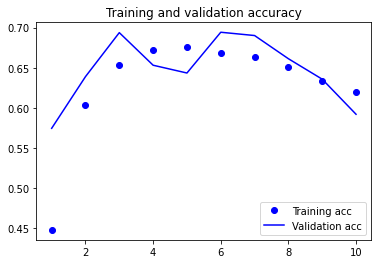

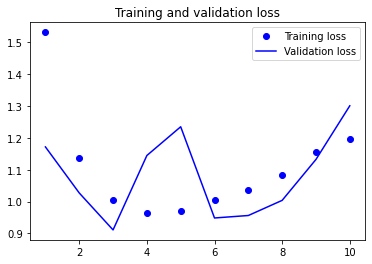

In [31]:
import matplotlib.pyplot as plt

acc = ehist.history['accuracy']
val_acc = ehist.history['val_accuracy']
loss = ehist.history['loss']
val_loss = ehist.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Tuned prebuilt model

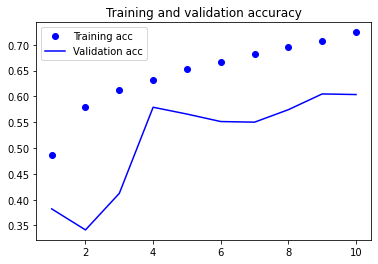

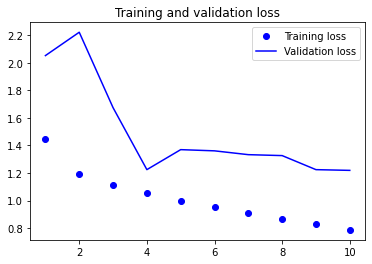

In [32]:
import matplotlib.pyplot as plt

acc = phist.history['accuracy']
val_acc = phist.history['val_accuracy']
loss = phist.history['loss']
val_loss = phist.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

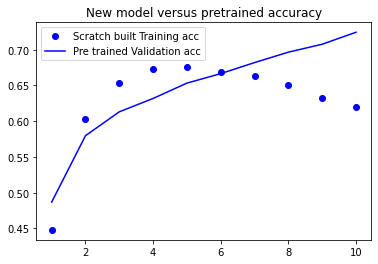

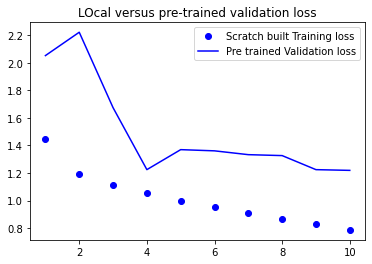

In [33]:
import matplotlib.pyplot as plt

acc = ehist.history['accuracy']
pt_acc = phist.history['accuracy']
loss = phist.history['loss']
pt_loss = phist.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Scratch built Training acc')
plt.plot(epochs, pt_acc, 'b', label='Pre trained Validation acc')
plt.title('New model versus pretrained accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Scratch built Training loss')
plt.plot(epochs, val_loss, 'b', label='Pre trained Validation loss')
plt.title('LOcal versus pre-trained validation loss')
plt.legend()

plt.show()

# Summary

Comparing the prebuilt model and tuned model with a new model, the acuuracy is a little better.   Also, the training progress seems more linearly up.

In addition to the resources with the Live Project, I found this resource to be very helpful:

https://towardsdatascience.com/cnn-transfer-learning-fine-tuning-9f3e7c5806b2

Had some trouble with error messages about "Missing Gradients".    Couldn't resolve.
Finally just started over with a new cell and this cleared up.   So, something was different.